# 十年平均TW50報酬指數 

In [9]:
import os
import pandas as pd
import numpy as np

file_path = r"C:\Users\Sydney\Desktop\KCL\Undergraduate\Year3\Final Individual Project\Data_Collection\TW50_index"
os.chdir(file_path)

file_names = [f"TAI50I-{year}-{month:02d}_edited.csv" for year in range(2010, 2020) for month in range(1, 13)]

# A Pandas Series containing the monthly values of the Taiwan 50 index from January 2010 to December 2019
all_return_index = []

for file_name in file_names:
    data_corrected = pd.read_csv(file_name, skiprows=2, names=["Date", "Taiwan 50 Index", "Taiwan 50 Total Return Index"])
    all_return_index.append(float(data_corrected['Taiwan 50 Index'][0].replace(",", "")))

# print(all_return_index)

# Convert the list to a Pandas Series
index_series = pd.Series(all_return_index)

# Calculate the monthly log returns
# Log return is calculated as the natural log of the ratio of the current month's index to the previous month's index
log_returns = np.log(index_series / index_series.shift(1))

# Calculate the average log return
# The average log return gives us the mean of the monthly log returns over the entire period
average_log_return = log_returns.mean()

# Annualize the average log return
# Since there are 12 months in a year, we multiply the average monthly log return by 12 to get the annualized return
annualized_return = average_log_return * 12

print("Annualized Average Log Return:", annualized_return)

Annualized Average Log Return: 0.08354718971359665


# 二次規劃

計算協方差矩陣

In [10]:
# Tp calculate the covariance matrix of expected returns
import pandas as pd
import numpy as np
import os

filtered_path = r"C:\Users\Sydney\Desktop\KCL\Undergraduate\Year3\Final Individual Project\Data_Collection\Status_of_TWSE\per_stock_data\Liquidity_Filtered_Stocks.csv"
filtered_df = pd.read_csv(filtered_path)

# Extract the list of stock codes from the filtered stocks
stock_code_list = filtered_df['股票代碼'].tolist()

# print(stock_code_list)
# print(len(stock_code_list))

ecpexted_return_data_path = r"C:\Users\Sydney\Desktop\KCL\Undergraduate\Year3\Final Individual Project\Data_Collection\Status_of_TWSE"
os.chdir(ecpected_return_data_path)

# Initialize an empty DataFrame to aggregate monthly returns data
all_returns_df = pd.DataFrame()

# Generate file names
file_names = [f"{year}{month:02d}_expected_return.csv" for year in range(2010, 2020) for month in range(1, 13)]
for file_name in file_names:
    df = pd.read_csv(file_name)
    date = file_name[:6] # Extract the date from the file name

    # Ensure stock codes are strings to match the format in stock_code_list
    df['股票代碼'] = df['股票代碼'].astype(str)
    stock_code_list = [str(code) for code in stock_code_list]
    # Filter rows that exist in stock_code_list
    filtered_stock_df = df[df['股票代碼'].isin(stock_code_list)].copy()
    # Continue to the next file if there are no matching stocks
    if filtered_stock_df.empty:
        continue
    
    # Add the date as a column for later use as an index
    filtered_stock_df.loc[:, 'Date'] = date
    
    # Pivot the table to have dates as rows, stock codes as columns, and expected returns as values
    monthly_returns_df = filtered_stock_df.set_index('Date')[['股票代碼', '預期回報']].pivot(columns='股票代碼', values='預期回報')
    
    # Concatenate with the aggregate DataFram
    all_returns_df = pd.concat([all_returns_df, monthly_returns_df])

# print(all_returns_df.head())

all_returns_df.to_csv("Corvariance_Dataset.csv", index=False)
print("Corvariance_Dataset.csv 已儲存")

# Calculate the covariance matrix of the returns
cov_matrix = all_returns_df.cov()
# print(cov_matrix)

cov_matrix.to_csv("Cov_Matrix.csv")
print("Cov_Matrix.csv 已儲存")

Corvariance_Dataset.csv 已儲存
Cov_Matrix.csv 已儲存


In [36]:
# Checking whether the covariance matrix of stock returns is semi-positive definite or positive definite.

# Load the covariance matrix from a CSV file
cov_matrix_df = pd.read_csv('Cov_Matrix.csv', index_col=0)
cov_matrix = cov_matrix_df.values

# Calculate the eigenvalues of the covariance matrix
eigenvalues = np.linalg.eigvals(cov_matrix)

# Check if the covariance matrix is semi-positive definite
# A matrix is semi-positive definite if all its eigenvalues are non-negative
is_semi_positive_definite = np.all(eigenvalues >= 0)

print("All eigenvalues:", eigenvalues)
print("Is the covariance matrix semi-positive definite:", is_semi_positive_definite)

# Check if the covariance matrix is positive definite
# A matrix is positive definite if all its eigenvalues are positive
is_positive_definite = np.all(eigenvalues > 0)
print("Is the covariance matrix positive definite:", is_positive_definite)

All eigenvalues: [ 3.43817422e-01  1.28261102e-01  7.13139689e-02  5.66248462e-02
  5.15507681e-02  4.36322611e-02  3.89983650e-02  3.36234813e-02
  3.23225674e-02  2.98794030e-02  2.78131512e-02  2.54799652e-02
  2.39356553e-02  2.19873402e-02  2.10923437e-02  1.95547066e-02
  1.92601991e-02  1.79943909e-02  1.73267141e-02  1.67462664e-02
  1.61749963e-02  1.58287913e-02  1.49487036e-02  1.45053520e-02
  1.37954514e-02  1.33079711e-02  1.30731480e-02  1.25668544e-02
  1.22982087e-02  1.17112309e-02  1.11554960e-02  1.07374543e-02
  1.01480517e-02  9.93018647e-03  9.51061831e-03  9.13638114e-03
  8.49879815e-03  8.06771038e-03  7.96674378e-03  7.78374098e-03
  7.30362096e-03  7.03548293e-03  6.68686410e-03  6.46273615e-03
  6.40232668e-03  5.89022513e-03  5.69027474e-03  5.26272762e-03
  5.09326990e-03  4.93340388e-03  4.58182198e-03  4.49876698e-03
  4.31239632e-03  4.05088616e-03  3.88533044e-03  3.67037632e-03
  3.50692828e-03  3.29510422e-03  3.23102590e-03  2.99094962e-03
  2.9475

將數據轉換成正定

In [37]:
# To employ the LedoitWolf shrinkage estimator to regularize the covariance matrix, 
# which can help ensure that the matrix is positive definite.
from sklearn.covariance import LedoitWolf
import pandas as pd

# Load the original covariance matrix from a CSV file
cov_matrix_df = pd.read_csv('Cov_Matrix.csv', index_col=0)
#print(cov_matrix_df)

# Initialize the LedoitWolf estimator
lw = LedoitWolf()

# Fit the LedoitWolf model to the covariance matrix data
# Note: Ideally, the LedoitWolf estimator should be fitted to returns data directly rather than to a precomputed covariance matrix.
# The use of covariance matrix values directly here is for demonstration purposes.
lw.fit(cov_matrix_df.values)

# Get the regularized covariance matrix
regularized_cov_matrix = lw.covariance_

# Convert the numpy matrix back to a DataFrame for easier handling, maintaining original index and columns
regularized_cov_matrix_df = pd.DataFrame(regularized_cov_matrix, index=cov_matrix_df.index, columns=cov_matrix_df.columns)

# Save the regularized covariance matrix to a new CSV file
regularized_cov_matrix_df.to_csv('Regularized_Cov_Matrix.csv')

print("Regularized_Cov_Matrix.csv have saved.")

# print(regularized_cov_matrix_df.head())

Regularized_Cov_Matrix.csv have saved.


In [38]:
# To ensure that the regularized covariance matrix is semi-positive definite or positive definite
import numpy as np 
import pandas as pd

# Load the regularized covariance matrix from a CSV file
regularized_cov_matrix_df = pd.read_csv('Regularized_Cov_Matrix.csv', index_col=0)
regularized_cov_matrix = regularized_cov_matrix_df.values

# Calculate the eigenvalues of the regularized covariance matrix
eigenvalues = np.linalg.eigvals(regularized_cov_matrix)

# Check if the regularized covariance matrix is semi-positive definite
# A matrix is semi-positive definite if all its eigenvalues are non-negative
is_semi_positive_definite = np.all(eigenvalues >= 0)

print("All eigenvalues:", eigenvalues)
print("Is the covariance matrix semi-positive definite:", is_semi_positive_definite)

# Check if the regularized covariance matrix is positive definite
# A matrix is positive definite if all its eigenvalues are positive
is_positive_definite = np.all(eigenvalues > 0)
print("Is the covariance matrix positive definite:", is_positive_definite)

All eigenvalues: [1.28930010e-04 7.85662111e-05 2.13787950e-05 1.75877053e-05
 1.48545840e-05 1.03706819e-05 8.51308754e-06 7.15425842e-06
 6.46015018e-06 5.35391992e-06 4.70084038e-06 4.57882083e-06
 4.25795023e-06 3.82650290e-06 3.62646319e-06 3.30594610e-06
 3.24471949e-06 2.97627083e-06 2.87121166e-06 2.75892715e-06
 2.63716334e-06 2.61340130e-06 2.45744037e-06 2.39902397e-06
 2.29799740e-06 2.23630189e-06 2.20025251e-06 2.12821271e-06
 2.10157419e-06 2.01390682e-06 1.96155059e-06 1.87647953e-06
 1.84983474e-06 1.82551435e-06 1.78463001e-06 1.74785649e-06
 1.68790137e-06 1.64503718e-06 1.63159264e-06 1.62400113e-06
 1.58239324e-06 1.57092501e-06 1.54433284e-06 1.52968259e-06
 1.52342691e-06 1.49401791e-06 1.46594788e-06 1.45594171e-06
 1.44833569e-06 1.43789353e-06 1.42202033e-06 1.41689462e-06
 1.41005355e-06 1.39624762e-06 1.39185173e-06 1.38326518e-06
 1.37722231e-06 1.36726580e-06 1.36796164e-06 1.35975449e-06
 1.35844873e-06 1.35439780e-06 1.35267668e-06 1.34791007e-06
 1.3448

# 二次規劃優化模型

In [11]:
pip install cvxopt

Note: you may need to restart the kernel to use updated packages.


In [40]:
import pandas as pd
import numpy as np
from cvxopt import matrix, solvers

# Annualized Average Log Return for Taiwan 50 Total Return Index
r_target = 0.08354718971359665 

# Load the necessary data file
expected_returns_file_path = r"C:\Users\Sydney\Desktop\KCL\Undergraduate\Year3\Final Individual Project\Data_Collection\Status_of_TWSE\per_stock_data\Liquidity_Filtered_Stocks.csv"
expected_returns_df = pd.read_csv(expected_returns_file_path)

regularized_cov_matrix_file_path = r"C:\Users\Sydney\Desktop\KCL\Undergraduate\Year3\Final Individual Project\Data_Collection\Status_of_TWSE\Regularized_Cov_Matrix.csv"
regularized_cov_matrix_df = pd.read_csv(regularized_cov_matrix_file_path, index_col=0)


# Extract stock codes and their expected returns
stock_codes = expected_returns_df['股票代碼'].tolist()
expected_returns = expected_returns_df['平均預期回報'].tolist()

# Confirm the number of assets matches the length of the expected returns array
n_assets = len(expected_returns)
print("Number of assets:", n_assets)

# Convert to numpy array for mathematical operations
expected_returns = np.array(expected_returns)
regularized_cov_matrix = regularized_cov_matrix_df.values

# Setup matrices for quadratic programming
P = matrix(regularized_cov_matrix)
q = matrix(np.zeros((n_assets, 1)))
G = matrix(np.vstack((-np.eye(n_assets)))) # Ensures non-negative weights
h = matrix(np.zeros(n_assets))
A = matrix(1.0, (1, n_assets)) # Sum of weights equals 1
b = matrix(1.0)

# Add additional constraint to ensure portfolio's expected return is at least r_target
G_extended = matrix(np.vstack((G, -expected_returns.reshape(1, -1))))
h_extended = matrix(np.vstack((h, -np.array([r_target]))))

# Solve the optimization problem
solvers.options['show_progress'] = False # Turn off solver progress display
sol = solvers.qp(P, q, G_extended, h_extended, A, b)

# Extract optimized weights
weights = np.array(sol['x']).flatten()
print("Optimized asset weights:\n", weights)

# print(expected_returns)

# Calculate portfolio's expected return rate
portfolio_expected_return_rate = np.dot(weights.T, expected_returns)
print(f"Portfolio's expected return rate: {portfolio_expected_return_rate}")

# Calculate portfolio volatility
portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(regularized_cov_matrix, weights)))
print(f"Portfolio volatility: {portfolio_volatility}")

weights_df = pd.DataFrame({
    'stock code': stock_codes, 
    'weights': weights
})

save_path = r"C:\Users\Sydney\Desktop\KCL\Undergraduate\Year3\Final Individual Project\Results\optimised_weights.csv"
weights_df.to_csv(save_path, index=False)
print("Save Successfully.")

Number of assets: 127
Optimized asset weights:
 [0.00654369 0.04633104 0.01344334 0.00492786 0.00193104 0.00166585
 0.00184373 0.01718889 0.00253199 0.00218997 0.00228687 0.00707634
 0.00102389 0.00187755 0.00723969 0.00223549 0.00198246 0.00644783
 0.00112964 0.00922091 0.00368194 0.00639445 0.02230633 0.00350737
 0.00740705 0.00232731 0.00129661 0.00066716 0.00375032 0.00113724
 0.00084665 0.00150449 0.03710489 0.00269012 0.001261   0.00086065
 0.00154073 0.00059505 0.00213437 0.00311553 0.00266199 0.00104709
 0.00103451 0.00131895 0.00105158 0.00250423 0.00181953 0.00312685
 0.01990859 0.00308681 0.00259799 0.00152189 0.00081981 0.00081531
 0.07861541 0.0014153  0.00093222 0.00119886 0.00111588 0.00346356
 0.020123   0.00095797 0.00079949 0.0020313  0.00314513 0.00066127
 0.00048876 0.00834979 0.00398296 0.0028411  0.00353592 0.00201498
 0.01253201 0.00191375 0.00143323 0.00430534 0.00841498 0.00290755
 0.00642151 0.00702528 0.00374121 0.01330834 0.05079935 0.0050023
 0.01416425 0.0

Pic is saved.


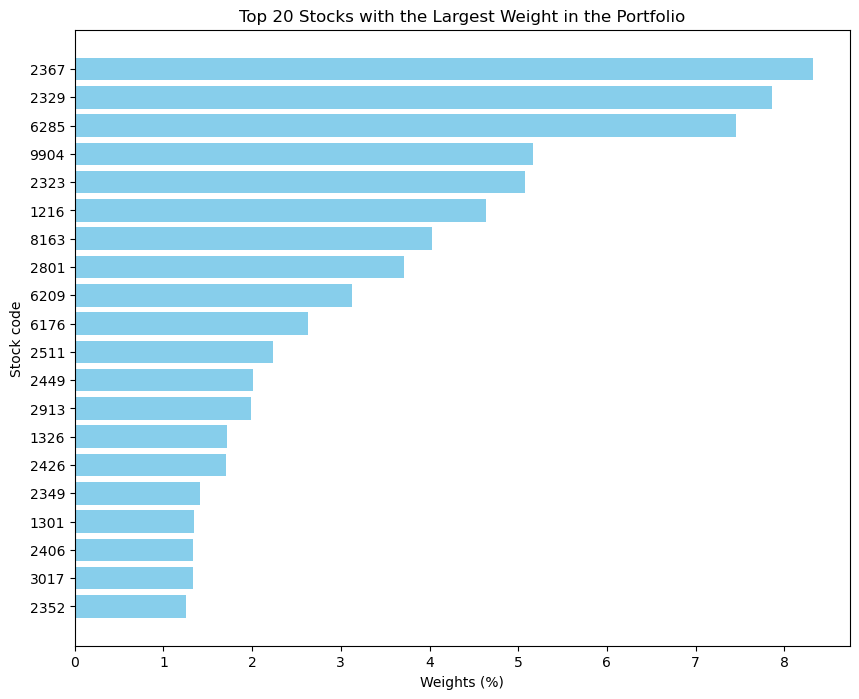

In [41]:
# To visualize the top 20 stock weights in an optimized portfolio derived from a quadratic programming optimization process.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Visualisation of the optimised wieghts results from portfilio
optimal_weights_file_path = r"C:\Users\Sydney\Desktop\KCL\Undergraduate\Year3\Final Individual Project\Results\optimised_weights.csv"
optimal_weighys_df = pd.read_csv(optimal_weights_file_path)

# Extract stock codes and their respective optimized weights, converting weights to percentages
stock_codes = optimal_weighys_df['stock code'].tolist()
weights = np.array(optimal_weighys_df['weights'].tolist()) * 100

# Present the top 20 weights of the results
N = 20
# Obtain indices for the top N weights in descending order
indices = np.argsort(weights)[-N:][::-1] 
# Extract stock codes and weights for the top N stocks
top_stock_codes = np.array(stock_codes)[indices]
top_weights = weights[indices]

# Create a horizontal bar chart visualizing the top 20 stock weights
plt.figure(figsize=(10, 8))
plt.barh(range(N), top_weights, color='skyblue')  
plt.xlabel('Weights (%)')
plt.ylabel('Stock code')
plt.title('Top 20 Stocks with the Largest Weight in the Portfolio')
# Set y-axis labels as stock codes, ensuring they are sorted by weight
plt.yticks(range(N), top_stock_codes)
plt.gca().invert_yaxis()  # Display the stock with the highest weight at the top

save_file_path = r"C:\Users\Sydney\Desktop\KCL\Undergraduate\Year3\Final Individual Project\Results\bar_chart_top_20_stocks_weights.png"
plt.savefig(save_file_path, bbox_inches='tight', dpi=300)
print("Pic is saved.")

plt.show()

Pic is saved.


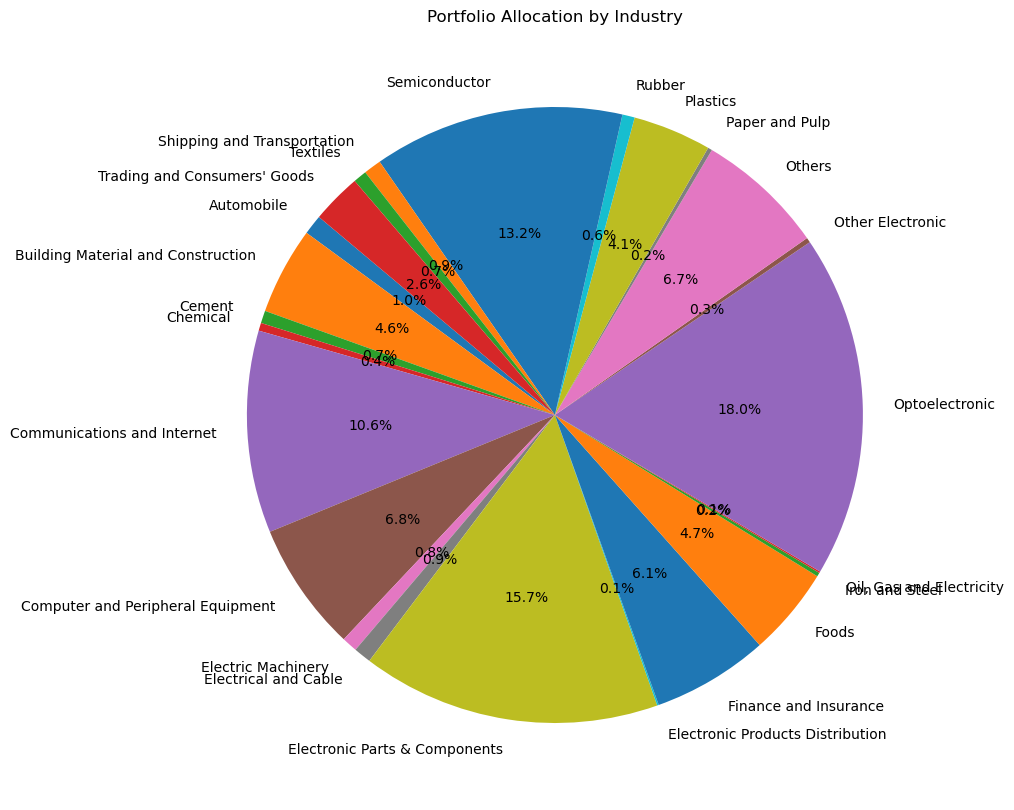

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Mapping from original category names to English
industry_name_mapping = {
    '行業類別': 'Industry',
    '水泥工業類': 'Cement',
    '食品工業類': 'Foods',
    '塑膠工業類': 'Plastics',
    '紡織纖維類': 'Textiles',
    '電機機械類': 'Electric Machinery',
    '電器電纜類': 'Electrical and Cable',
    '玻璃陶瓷類': 'Glass and Ceramics',
    '造紙工業類': 'Paper and Pulp',
    '鋼鐵工業類': 'Iron and Steel',
    '橡膠工業類': 'Rubber',
    '汽車工業類': 'Automobile',
    '建材營造類': 'Building Material and Construction',
    '航運業類': 'Shipping and Transportation',
    '觀光事業類': 'Tourism',
    '金融保險類': 'Finance and Insurance',
    '貿易百貨類': "Trading and Consumers' Goods",
    '化學工業類': 'Chemical',
    '生技醫療類': 'Biotechnology & Medical Care',
    '油電燃氣類': 'Oil, Gas and Electricity',
    '半導體業類': 'Semiconductor',
    '電腦及周邊設備業類': 'Computer and Peripheral Equipment',
    '光電業類': 'Optoelectronic',
    '通信網路業類': 'Communications and Internet',
    '電子零組件業類': 'Electronic Parts & Components',
    '電子通路業類': 'Electronic Products Distribution',
    '資訊服務業類': 'Information Service',
    '其他電子業類': 'Other Electronic',
    '其他類': 'Others',
    '全額分盤': 'Stocks Requiring Full Delivery'
}

# Load the optimized weights data
optimal_weights_file_path = r"C:\Users\Sydney\Desktop\KCL\Undergraduate\Year3\Final Individual Project\Results\optimised_weights.csv"
optimal_weights_df = pd.read_csv(optimal_weights_file_path)

stock_codes = optimal_weights_df['stock code'].tolist()
weights = optimal_weighys_df['weights'].tolist()

# Load the stock categories data
stock_categories_file_path = r"C:\Users\Sydney\Desktop\KCL\Undergraduate\Year3\Final Individual Project\Data_Collection\Stock_Price\Stock_Categories.csv"
stock_categories_df = pd.read_csv(stock_categories_file_path)

# Merge the optimized weights with their respective stock categories
merged_df = pd.merge(optimal_weights_df, stock_categories_df, left_on ='stock code', right_on = '股票代碼')
# Replace the original category names with the English names
merged_df['行業類別'] = merged_df['行業類別'].replace(industry_name_mapping)

# Group by industry and sum up the weights to get total allocation by industry
industry_weights = merged_df.groupby('行業類別')['weights'].sum().reset_index()

# Plotting the portfolio allocation by industry as a pie chart
plt.figure(figsize=(10, 10))
plt.pie(industry_weights['weights'], labels=industry_weights['行業類別'], autopct='%1.1f%%', startangle=140)
plt.title('Portfolio Allocation by Industry')

save_file_path = r"C:\Users\Sydney\Desktop\KCL\Undergraduate\Year3\Final Individual Project\Results\pie_chart_portfolio_allocation_by_industry.png"
plt.savefig(save_file_path, bbox_inches='tight', dpi=300)
print("Pic is saved.")

plt.show()

Pic is saved.


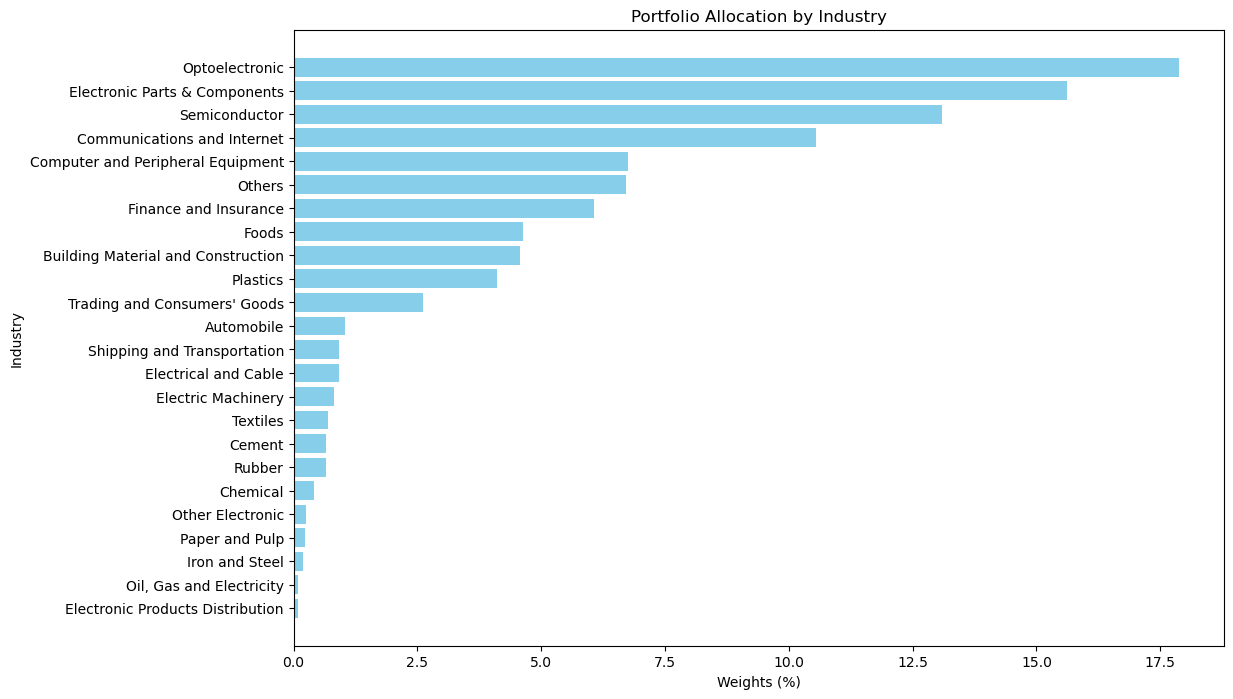

In [43]:
import matplotlib.pyplot as plt

# Sort the DataFrame to ensure that weights are from largest to smallest
industry_weights_sorted = industry_weights.sort_values(by='weights', ascending=False)

# Convert weights to percentages for a more intuitive representation
industry_weights_sorted['weights'] = industry_weights_sorted['weights'] * 100

# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.barh(industry_weights_sorted['行業類別'], industry_weights_sorted['weights'], color='skyblue')

plt.xlabel('Weights (%)')
plt.ylabel('Industry')
plt.title('Portfolio Allocation by Industry')
plt.gca().invert_yaxis()  # Invert the y-axis so that higher weights are at the top

save_file_path = r"C:\Users\Sydney\Desktop\KCL\Undergraduate\Year3\Final Individual Project\Results\bar_chart_portfolio_allocation_by_industry.png"
plt.savefig(save_file_path, bbox_inches='tight', dpi=300)
print("Pic is saved.")

plt.show()


In [23]:
# Pair each stock code with its corresponding weight
weighted_stock_data = list(zip(stock_codes, weights))

# Sort the list of tuples by weight in descending order and select the top 20
top_20_weighted_stocks = sorted(weighted_stock_data, key=lambda x:x[1], reverse=True)[:20]

# Initialize a list to store the stock codes of the top 20 weighted stocks
top_20_weighted_stock_code = []

print("Top 20 stocks with the highest weights:")

for stock, weight in top_20_weighted_stocks:
    print(f"Stock code: {stock}, Weight: {weight}")
    top_20_weighted_stock_code.append(stock)

前20支權重最重的股票: 
Stock code: 2367, Weight: 0.0832269922337106
Stock code: 2329, Weight: 0.0786154050463239
Stock code: 6285, Weight: 0.0745836631567272
Stock code: 9904, Weight: 0.0516231945799224
Stock code: 2323, Weight: 0.0507993537321326
Stock code: 1216, Weight: 0.0463310362734697
Stock code: 8163, Weight: 0.0403073372652738
Stock code: 2801, Weight: 0.0371048912049294
Stock code: 6209, Weight: 0.031270377409474
Stock code: 6176, Weight: 0.0262750904487513
Stock code: 2511, Weight: 0.0223063341235721
Stock code: 2449, Weight: 0.0201229998210645
Stock code: 2913, Weight: 0.0199085867319438
Stock code: 1326, Weight: 0.0171888898130594
Stock code: 2426, Weight: 0.0170225056684591
Stock code: 2349, Weight: 0.0141642463237806
Stock code: 1301, Weight: 0.0134433402517286
Stock code: 2406, Weight: 0.0133809863785133
Stock code: 3017, Weight: 0.0133083409331128
Stock code: 2352, Weight: 0.0125320085730214


In [24]:
print(top_20_weighted_stock_code)

[2367, 2329, 6285, 9904, 2323, 1216, 8163, 2801, 6209, 6176, 2511, 2449, 2913, 1326, 2426, 2349, 1301, 2406, 3017, 2352]


# 進行二次二次規劃

計算前20支股票協方差矩陣

篩出前20支股票的資料

In [44]:
# To focus on a subset of stocks within a portfolio

# Load the necessary data file
expected_returns_file_path = r"C:\Users\Sydney\Desktop\KCL\Undergraduate\Year3\Final Individual Project\Data_Collection\Status_of_TWSE\per_stock_data\Liquidity_Filtered_Stocks.csv"
expected_returns_df = pd.read_csv(expected_returns_file_path)
#print(expected_returns_df['股票代碼'])

# Ensure the stock codes in the DataFrame are treated as strings for matching
expected_returns_df['股票代碼'] = expected_returns_df['股票代碼'].astype(str)
# List of the top 20 stocks' codes, converted to strings for consistency
top_20_weighted_stock_code = [str(code) for code in top_20_weighted_stock_code]

# Filter the DataFrame to only include rows corresponding to the top 20 stocks
top_20_expected_returns_df = expected_returns_df[expected_returns_df['股票代碼'].isin(top_20_weighted_stock_code)]
# print(top_20_expected_returns_df)

save_path = r"C:\Users\Sydney\Desktop\KCL\Undergraduate\Year3\Final Individual Project\Data_Collection\Status_of_TWSE\Top_20_Filtered_DataSet.csv"
top_20_expected_returns_df.to_csv(save_path)
print("File saved successfully.")

File saved successfully.


In [47]:
import pandas as pd
import numpy as np
import os

file_path = r"C:\Users\Sydney\Desktop\KCL\Undergraduate\Year3\Final Individual Project\Data_Collection\Status_of_TWSE"
os.chdir(file_path)

# Initialize an empty DataFrame to store the returns data for all selected stocks
all_returns_df = pd.DataFrame()

# Generate file names
file_names = [f"{year}{month:02d}_expected_return.csv" for year in range(2010, 2020) for month in range(1, 13)]
for file_name in file_names:
    df = pd.read_csv(file_name)
    date = file_name[:6] # Extract the date from the file name

    # Ensure stock codes are treated as strings to match the list of top 20 stock codes
    df['股票代碼'] = df['股票代碼'].astype(str)
    top_20_weighted_stock_code = [str(code) for code in top_20_weighted_stock_code]
    # Filter the DataFrame to include only rows for the top 20 weighted stocks
    filtered_stock_df = df[df['股票代碼'].isin(top_20_weighted_stock_code)].copy()
    # If there are no matches for the top 20 stocks in this file, skip to the next file
    if filtered_stock_df.empty:
        continue
    
    # Add the date as a column for easy indexing later
    filtered_stock_df.loc[:, 'Date'] = date
    
    # Pivot the DataFrame to have dates as rows, stock codes as columns, and expected returns as values
    monthly_returns_df = filtered_stock_df.set_index('Date')[['股票代碼', '預期回報']].pivot(columns='股票代碼', values='預期回報')
    
    # Concatenate this month's returns data with the cumulative DataFrame
    all_returns_df = pd.concat([all_returns_df, monthly_returns_df])

# print(all_returns_df.head())
    
all_returns_df.to_csv("Top_20_Corvariance_Dataset.csv", index=False)
print("Results saved")

# Calculate the covariance matrix for the top 20 stocks
top_20_cov_matrix = all_returns_df.cov()
# print(top_20_cov_matrix)

top_20_cov_matrix.to_csv("Top_20_Cov_Matrix.csv")
print("Covariance matrix saved")

Results saved
Covariance matrix saved


In [48]:
# Load the covariance matrix from a CSV file
top_20_cov_matrix_df = pd.read_csv('Top_20_Cov_Matrix.csv', index_col=0)
# Convert the DataFrame to a NumPy array for eigenvalue computation
top_20_cov_matrix = top_20_cov_matrix_df.values

# Calculate the eigenvalues of the covariance matrix
eigenvalues = np.linalg.eigvals(top_20_cov_matrix)

# Check if the regularized covariance matrix is semi-positive definite
# A matrix is semi-positive definite if all its eigenvalues are non-negative
is_semi_positive_definite = np.all(eigenvalues >= 0)

print("All eigenvalues:", eigenvalues)
print("Is the covariance matrix semi-positive definite:", is_semi_positive_definite)

# Check if the regularized covariance matrix is positive definite
# A matrix is positive definite if all its eigenvalues are positive
is_positive_definite = np.all(eigenvalues > 0)
print("Is the covariance matrix positive definite:", is_positive_definite)

All eigenvalues: [0.07909599 0.03262085 0.01654113 0.01527222 0.01367504 0.01186375
 0.00954559 0.00038959 0.00839769 0.00774624 0.00700585 0.00150662
 0.00138989 0.00236381 0.00281317 0.00344137 0.0038593  0.00499185
 0.00549919 0.00539893]
Is the covariance matrix semi-positive definite: True
Is the covariance matrix positive definite: True


二次優化模型

In [49]:
import pandas as pd
import numpy as np
from cvxopt import matrix, solvers

# Annualized Average Log Return for Taiwan 50 Total Return Index
r_target = 0.08354718971359665 

# Load the expected returns for the top 20 stocks
top_20_file_path = r"C:\Users\Sydney\Desktop\KCL\Undergraduate\Year3\Final Individual Project\Data_Collection\Status_of_TWSE\Top_20_Filtered_DataSet.csv"
top_20_expected_returns_df = pd.read_csv(top_20_file_path)

# Extract stock codes and their expected returns
top_20_stock_codes = top_20_expected_returns_df['股票代碼'].tolist()
top_20_expected_returns = top_20_expected_returns_df['平均預期回報'].tolist()

# Determine the number of assets to ensure it matches the length of the expected returns array
n_assets = len(top_20_expected_returns)
print("Number of assets:", n_assets)

# Convert to numpy array for mathematical operations
top_20_expected_returns = np.array(top_20_expected_returns)
# Extract the covariance matrix as a numpy array
top_20_cov_matrix = top_20_cov_matrix_df.values

# Set up the quadratic program parameters
P2 = matrix(top_20_cov_matrix)
q2 = matrix(np.zeros((n_assets,1)))

G2 = matrix(np.vstack((-np.eye(n_assets), -np.ones((1, n_assets))))) # Negative identity matrix for non-negativity constraint and sum to 1 constraint
h2 = matrix(np.vstack((np.zeros((n_assets, 1)), -r_target))) # Zero and negative target return
# Additional constraint to ensure the portfolio's expected return is at least the target return
G_min_return = matrix(np.vstack((G2, -top_20_expected_returns.reshape(1, -1))))
h_min_return = matrix(np.vstack((h2, -np.array([[r_target]]))))


A2 = matrix(np.ones((1, n_assets))) # Sum of weights equals 1 constraint
b2 = matrix(1.0)

# Solve the optimization problem
solvers.options['show_progress'] = False # Turn off solver progress display
sol2 = solvers.qp(P2, q2, G_min_return, h_min_return, A2, b2)
new_weights = np.array(sol2['x']).flatten()
print("Optimized asset weights:\n", new_weights)


# Calculate the portfolio's expected return and volatility
second_portfolio_return = np.dot(top_20_expected_returns, new_weights)
second_portfolio_volatility = np.sqrt(np.dot(new_weights.T, np.dot(top_20_cov_matrix, new_weights)))
print(f"Portfolio expected return: {second_portfolio_return}")
print(f"Portfolio volatility (risk): {second_portfolio_volatility}")

# Save the new weights to a CSV file
new_weights_df = pd.DataFrame({
    'stock code': top_20_stock_codes, 
    'weights': new_weights
})

save_path = r"C:\Users\Sydney\Desktop\KCL\Undergraduate\Year3\Final Individual Project\Results\top_20_optimised_weights.csv"
new_weights_df.to_csv(save_path, index=False)
print("Save Successfully.")

Number of assets: 20
Optimized asset weights:
 [3.48150794e-01 6.46422034e-02 9.86776054e-02 2.10977961e-04
 2.92184461e-06 8.09735395e-06 2.13864189e-05 3.44455105e-06
 1.52139422e-06 2.32334008e-06 6.38573639e-02 2.97914360e-02
 2.09071835e-02 4.73493851e-06 3.29436999e-02 2.84251161e-02
 9.30252699e-03 7.82360520e-02 1.35675743e-06 2.24809255e-01]
Portfolio expected return: 0.08354790350926769
Portfolio volatility (risk): 0.03341745456381883
Save Successfully.


In [50]:
# Define a threshold for displaying weights; weights below this threshold will be shown as 0%
threshold = 0.01  # 0.01% threshold

# Apply the threshold and format the weights for display
# Units are in percentage
weights_formatted = [round(weight, 2) if weight >= threshold else 0 for weight in weights_percentage]

# Prepare a list for the formatted weight percentages
weight_percentage = []

# Print the formatted weight percentages
for weight in weights_formatted:
    weight_percentage.append(weight)
print(weight_percentage)

[34.82, 6.46, 9.87, 0.02, 0, 0, 0, 0, 0, 0, 6.39, 2.98, 2.09, 0, 3.29, 2.84, 0.93, 7.82, 0, 22.48]


Pic is saved.


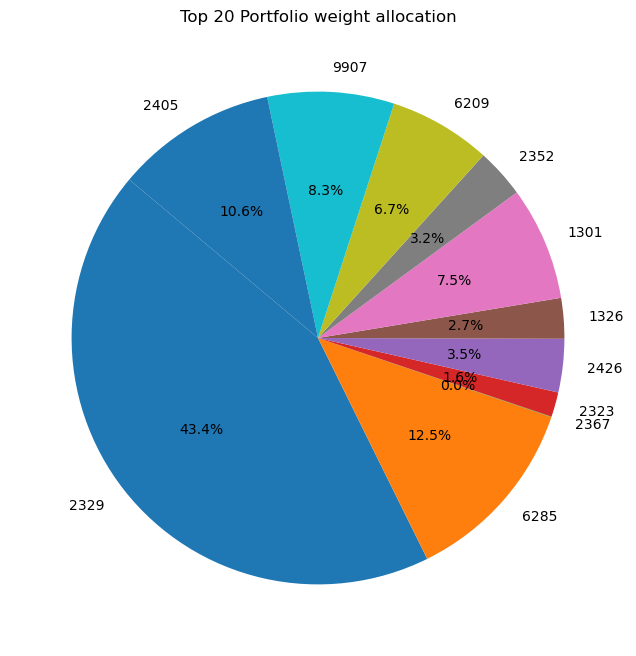

In [51]:
import matplotlib.pyplot as plt
# Visualisation of top 20 stocks portfolio

# Stock codes and weights data
top_20_stock_codes = ['2329', '6285', '2367', '9904', '1216', '2511', '2323', '8163', '2801', '2913',
                      '2426', '1326', '2406', '3189', '1301', '2352', '6209', '9907', '3017', '2405']
new_weights = [43.42, 12.49, 0.03, 0, 0, 0, 1.62, 0, 0, 0, 3.5, 2.66, 0, 0, 7.45, 3.23, 6.71, 8.31, 0, 10.58]

# Remove stocks with a weight of 0 and their corresponding codes
filtered_weights = [weight for weight in new_weights if weight > 0]
filtered_stock_codes = [code for code, weight in zip(top_20_stock_codes, new_weights) if weight > 0]

# Plot the pie chart for the portfolio weight allocation
plt.figure(figsize=(8, 8))
plt.pie(filtered_weights, labels=filtered_stock_codes, autopct='%1.1f%%', startangle=140)
plt.title('Top 20 Portfolio weight allocation')

save_file_path = r"C:\Users\Sydney\Desktop\KCL\Undergraduate\Year3\Final Individual Project\Results\pie_chart_top_20_portfolio_weight_allocation.png"
plt.savefig(save_file_path, bbox_inches='tight', dpi=300)
print("Pic is saved.")

plt.show()


Pic is saved.


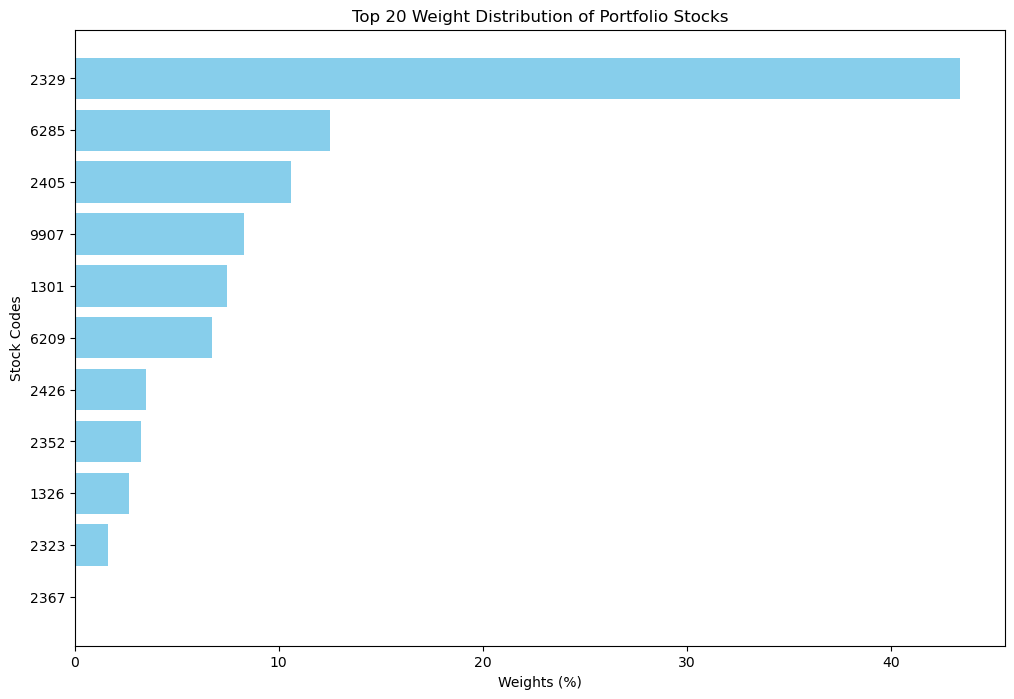

In [52]:
import matplotlib.pyplot as plt

# Stock codes and weights data
top_20_stock_codes = ['2329', '6285', '2367', '9904', '1216', '2511', '2323', '8163', '2801', '2913',
                      '2426', '1326', '2406', '3189', '1301', '2352', '6209', '9907', '3017', '2405']
new_weights = [43.42, 12.49, 0.03, 0, 0, 0, 1.62, 0, 0, 0, 3.5, 2.66, 0, 0, 7.45, 3.23, 6.71, 8.31, 0, 10.58]

# Remove stocks with a weight of 0 and their corresponding codes
filtered_weights = [weight for weight in new_weights if weight > 0]
filtered_stock_codes = [code for code, weight in zip(top_20_stock_codes, new_weights) if weight > 0]

# Sort the remaining stocks and their weights in descending order of weights
sorted_pairs = sorted(zip(filtered_weights, filtered_stock_codes), reverse=True)
sorted_weights, sorted_stock_codes = zip(*sorted_pairs)  # 解包排序后的权重和股票代码

# Plot the bar chart
plt.figure(figsize=(12, 8))
plt.barh(sorted_stock_codes, sorted_weights, color='skyblue')
plt.ylabel('Stock Codes')
plt.xlabel('Weights (%)')
plt.title('Top 20 Weight Distribution of Portfolio Stocks')
plt.gca().invert_yaxis()  # Invert the y-axis to have the stock with the highest weight on top

save_file_path = r"C:\Users\Sydney\Desktop\KCL\Undergraduate\Year3\Final Individual Project\Results\bar_chart_top_20_weight_distribution_portfolio_stocks.png"
plt.savefig(save_file_path, bbox_inches='tight', dpi=300)
print("Pic is saved.")

plt.show()


Pic is saved.


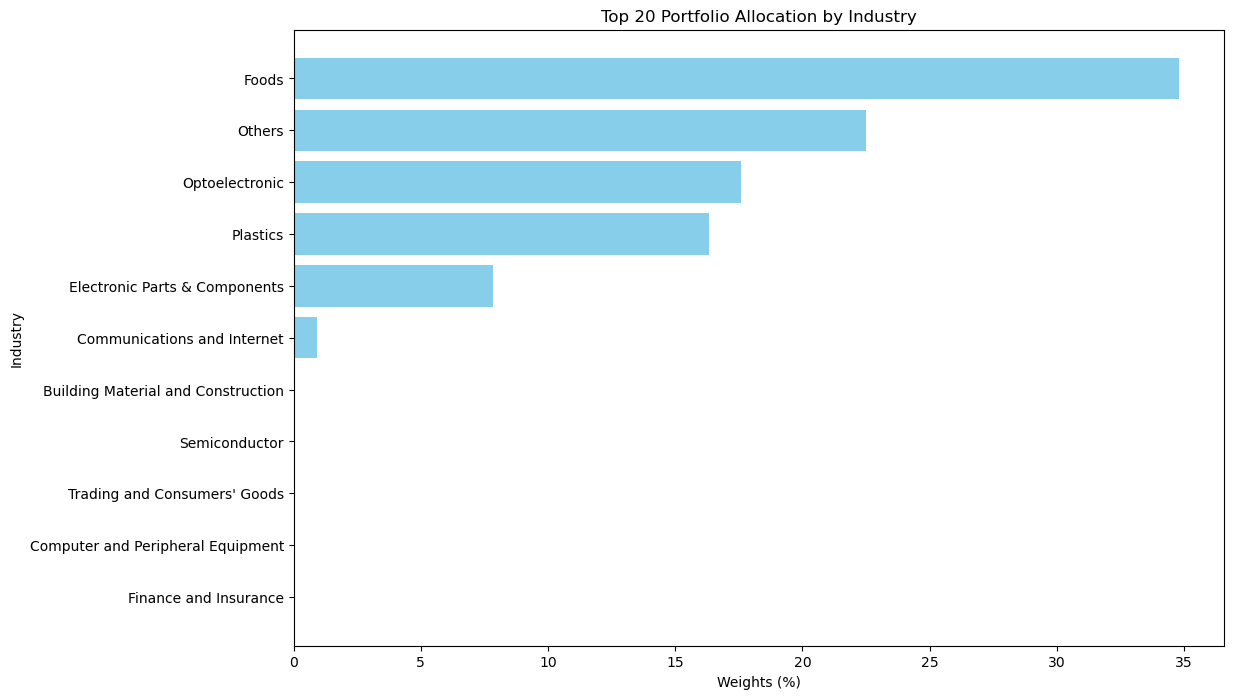

In [53]:
import matplotlib.pyplot as plt
import pandas as pd

# Mapping from original industry categories to their English counterparts
industry_name_mapping = {
    '行業類別': 'Industry',
    '水泥工業類': 'Cement',
    '食品工業類': 'Foods',
    '塑膠工業類': 'Plastics',
    '紡織纖維類': 'Textiles',
    '電機機械類': 'Electric Machinery',
    '電器電纜類': 'Electrical and Cable',
    '玻璃陶瓷類': 'Glass and Ceramics',
    '造紙工業類': 'Paper and Pulp',
    '鋼鐵工業類': 'Iron and Steel',
    '橡膠工業類': 'Rubber',
    '汽車工業類': 'Automobile',
    '建材營造類': 'Building Material and Construction',
    '航運業類': 'Shipping and Transportation',
    '觀光事業類': 'Tourism',
    '金融保險類': 'Finance and Insurance',
    '貿易百貨類': "Trading and Consumers' Goods",
    '化學工業類': 'Chemical',
    '生技醫療類': 'Biotechnology & Medical Care',
    '油電燃氣類': 'Oil, Gas and Electricity',
    '半導體業類': 'Semiconductor',
    '電腦及周邊設備業類': 'Computer and Peripheral Equipment',
    '光電業類': 'Optoelectronic',
    '通信網路業類': 'Communications and Internet',
    '電子零組件業類': 'Electronic Parts & Components',
    '電子通路業類': 'Electronic Products Distribution',
    '資訊服務業類': 'Information Service',
    '其他電子業類': 'Other Electronic',
    '其他類': 'Others',
    '全額分盤': 'Stocks Requiring Full Delivery'
}

# Load the stock categories data
stock_categories_file_path = r"C:\Users\Sydney\Desktop\KCL\Undergraduate\Year3\Final Individual Project\Data_Collection\Stock_Price\Stock_Categories.csv"
stock_categories_df = pd.read_csv(stock_categories_file_path)

# Load the top 20 optimized weights data
top_20_file_path = r"C:\Users\Sydney\Desktop\KCL\Undergraduate\Year3\Final Individual Project\Results\top_20_optimised_weights.csv"
top_20_weights_df = pd.read_csv(top_20_file_path)

# Merge the two datasets on the stock code column
merged_df = pd.merge(top_20_weights_df, stock_categories_df, left_on='stock code', right_on='股票代碼')
# Replace industry categories with their English names
merged_df['行業類別'] = merged_df['行業類別'].replace(industry_name_mapping)


# Convert weights to percentages
merged_df['weights'] = merged_df['weights'] * 100

# Group by industry and sum up weights
industry_weights = merged_df.groupby('行業類別')['weights'].sum().reset_index()
# Sort industries by total weight
industry_weights_sorted = industry_weights.sort_values(by='weights', ascending=False)

# Plot the bar chart showing the portfolio allocation by industry
plt.figure(figsize=(12, 8))
plt.barh(industry_weights_sorted['行業類別'], industry_weights_sorted['weights'], color='skyblue')
plt.xlabel('Weights (%)')
plt.ylabel('Industry')
plt.title('Top 20 Portfolio Allocation by Industry')
plt.gca().invert_yaxis()  # Invert the y-axis to display higher weights at the top

save_file_path = r"C:\Users\Sydney\Desktop\KCL\Undergraduate\Year3\Final Individual Project\Results\bar_chart_top_20_portfolio_allocation_by_industry.png"
plt.savefig(save_file_path, bbox_inches='tight', dpi=300)
print("Pic is saved.")

plt.show()